In [8]:
from PIL import Image
import os
import glob 
import numpy as np

# Path to the directory containing the images
image_dir = 'weifhts/*npy'
file_names = glob.glob(image_dir)
file_names = sorted(file_names)
print(file_names)
weights = [np.load(file_name).squeeze(0) for file_name in file_names if np.load(file_name).shape[1] == 4]


['weifhts/adaptive_additive.npy', 'weifhts/adaptive_dot.npy', 'weifhts/adaptive_scaled_dot.npy', 'weifhts/global_additive.npy', 'weifhts/global_dot.npy', 'weifhts/global_scaled_dot.npy', 'weifhts/group_query_additive.npy', 'weifhts/group_query_dot.npy', 'weifhts/group_query_scaled_dot.npy', 'weifhts/hierarchical_additive.npy', 'weifhts/hierarchical_dot.npy', 'weifhts/hierarchical_scaled_dot.npy', 'weifhts/kernelized_additive.npy', 'weifhts/kernelized_dot.npy', 'weifhts/kernelized_scaled_dot.npy', 'weifhts/local_additive.npy', 'weifhts/local_dot.npy', 'weifhts/local_scaled_dot.npy', 'weifhts/multihead_additive.npy', 'weifhts/multihead_dot.npy', 'weifhts/multihead_scaled_dot.npy', 'weifhts/stochastic_additive.npy', 'weifhts/stochastic_dot.npy', 'weifhts/stochastic_scaled_dot.npy']


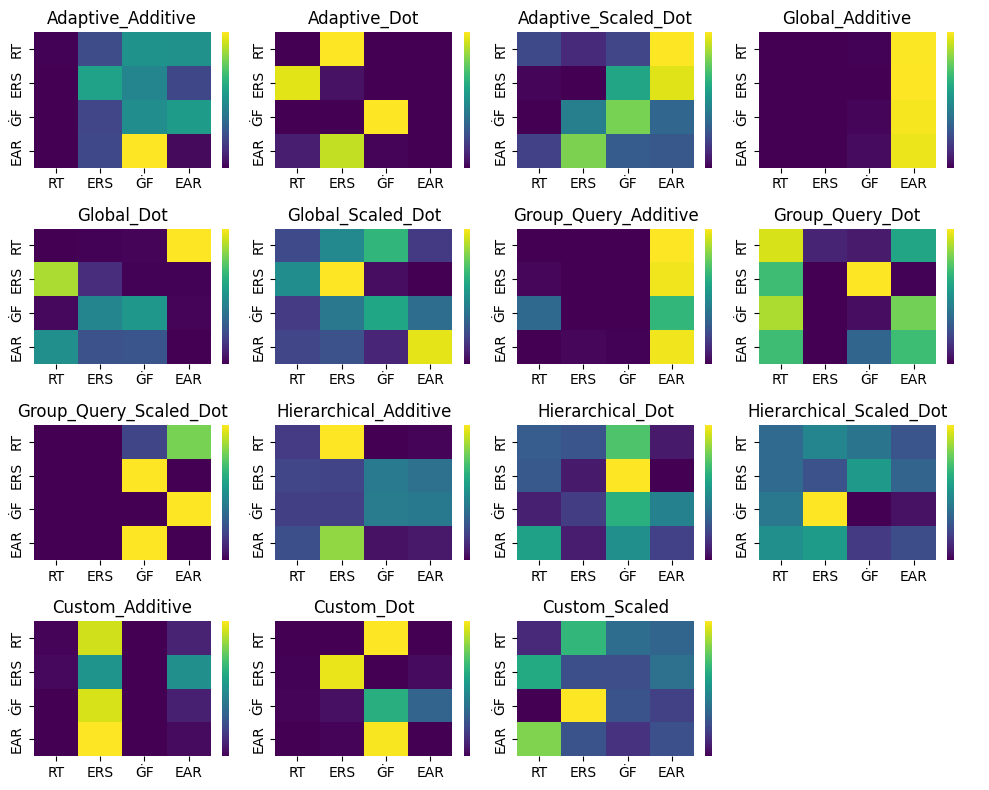

In [24]:
#plot the heatmap

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a dataframe from the weights
fig, axs = plt.subplots(4, 4, figsize=(10, 8))

# Flatten the axs array for easy iteration
axs = axs.flatten()
input_tokens = ['RT', 'ERS', 'ĠF', 'EAR']
# Iterate through the matrices and the axes to plot each heatmap
for i, (matrix, ax) in enumerate(zip(weights, axs)):
    heatmap = sns.heatmap(matrix, ax=ax,xticklabels=input_tokens, yticklabels=input_tokens ,cmap='viridis', annot=False, cbar=True)
    if heatmap.collections[0].colorbar:  # Check if the heatmap has a colorbar
        heatmap.collections[0].colorbar.set_ticks([]) 
    title = file_names[i].split('/')[-1].split('.')[0]
    if('kernelized' in title):
        title = "custom_" + title.split("_")[1]
    ax.set_title(f"{title.title()}")
    

axs[-1].axis('off')
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [93]:
# Open the log file and read the last line
import pandas as pd
import glob
final = pd.DataFrame()
for filename in glob.glob('models/*/*.txt'):
    log_file_path = filename
    file_name = filename.split("/")[-2]
    print(file_name)
    t = file_name.split("_")

    attn_fn = t[0]
    if(attn_fn == 'kernelized'):
        attn_fn = "custom"
        align_fn = "_".join(t[1:])
    if(attn_fn == 'group'):
        attn_fn = "group_query"
        align_fn = "_".join(t[2:])
    else:
        align_fn = "_".join(t[1:])
    df = pd.read_csv(log_file_path , header=None)
    df.rename(columns={0: 'epoch', 1: 'Train loss', 2: 'Val loss', 3: 'Accuracy', 4: 'Precision' ,5 : 'Recall' ,6 : "F1 score" ,7: "Time"}, inplace=True)
    for c in df.columns:
        if c == 'epoch': continue 
        df[c] = df[c].apply(lambda x : x.split(':')[1].split(" ")[1])
        df[c] = df[c].astype(float)
    
    data = df.loc[[df['F1 score'].idxmax()]]
    data["Time"] = data["Time"].mean()
    data['Attention Function'] = attn_fn
    data['Alignment Function'] = align_fn

    final = pd.concat([final, data])



   

hierarchical_dot
kernelized_scaled_dot
stochastic_additive
group_query_additive
global_scaled_dot
group_query_dot
stochastic_scaled_dot
adaptive_additive
multihead_scaled_dot
hierarchical_scaled_dot
multihead_dot
local_scaled_dot
hierarchical_additive
stochastic_dot
local_additive
group_query_scaled_dot
kernelized_dot
kernelized_additive
multihead_additive
global_dot
local_dot
global_additive
adaptive_scaled_dot
adaptive_dot


In [ ]:
final.sort_values(by=['Attention Function'], ascending=False, inplace=True)
final.drop(columns=['epoch' , 8], inplace=True)

In [95]:
df = final

In [96]:
last_two_columns = df.columns[-2:].tolist()

# Reorder columns: Move the last two columns to the first two positions
df = df[last_two_columns + [col for col in df.columns if col not in last_two_columns]]

In [97]:
df

,Attention Function,Alignment Function,epoch,Train loss,Val loss,Accuracy,Precision,Recall,F1 score,Time,8
98,stochastic,additive,Epoch 99,0.0141,0.0235,0.6362,0.8414,0.6385,0.7261,36.121511,0.000000
98,stochastic,scaled_dot,Epoch 99,0.0160,0.0201,0.6511,0.8826,0.6514,0.7496,28.808603,0.000000
96,stochastic,dot,Epoch 97,0.0135,0.0201,0.6733,0.8611,0.6877,0.7647,29.394356,0.000000
95,multihead,dot,Epoch 96,0.0009,0.0275,0.7521,0.8577,0.7824,0.8183,28.639605,0.000000
87,multihead,additive,Epoch 88,0.0013,0.0242,0.7535,0.8709,0.7888,0.8278,30.288501,0.000000
99,multihead,scaled_dot,Epoch 100,0.0008,0.0263,0.7678,0.8649,0.7975,0.8299,34.800480,0.000000
80,local,dot,Epoch 81,0.0097,0.0235,0.6622,0.9094,0.6499,0.7581,105.758020,0.000000
79,local,additive,Epoch 80,0.0092,0.0212,0.6650,0.9174,0.6601,0.7678,112.461967,0.000000
74,local,scaled_dot,Epoch 75,0.0096,0.0204,0.6659,0.9097,0.6707,0.7721,115.644519,322.223633
92,hierarchical,dot,Epoch 93,0.0043,0.0266,0.6719,0.8769,0.6768,0.7639,33.174752,0.000000


In [98]:
# Save the final dataframe to a CSV file
df.to_csv('result/2.csv')

In [57]:
df = pd.DataFrame.from_dict({(i, j): data[i][j] 
                             for i in data.keys() 
                             for j in data[i].keys()}, 
                            orient='index')

In [59]:
df.to_csv('result/2.csv')

In [2]:
!pip install pandas tabulate termcolor


AttributeError: 'Styler' object has no attribute 'render'

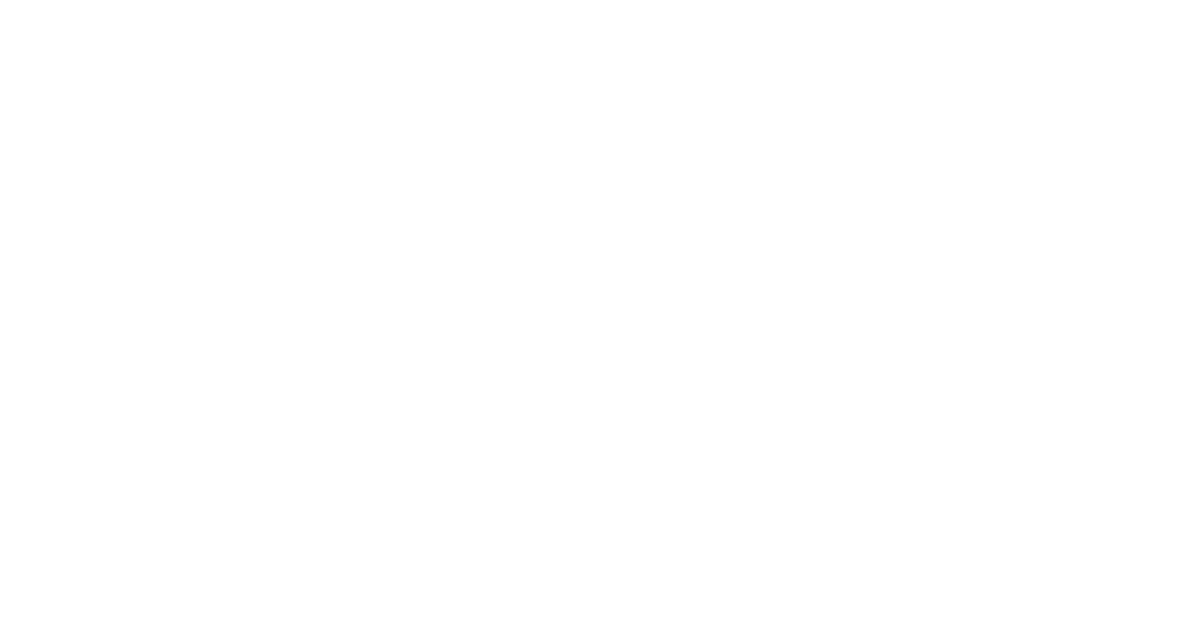

In [ ]:
import pandas as pd
from tabulate import tabulate
from termcolor import colored

# Data
data = {
    "Attention Type": [
        "Multihead", "Multihead", "Multihead", "Local", "Local", "Local",
        "Hierarchical", "Hierarchical", "Hierarchical", "Group Query", "Group Query", "Group Query",
        "Stochastic", "Stochastic", "Stochastic", "Adaptive", "Adaptive", "Adaptive",
        "Global", "Global", "Global", "Custom", "Custom", "Custom"
    ],
    "Mechanism": [
        "Scaled Dot", "Additive", "Dot", "Dot", "Scaled Dot", "Additive",
        "Scaled Dot", "Additive", "Dot", "Scaled Dot", "Additive", "Dot",
        "Additive", "Dot", "Scaled Dot", "Dot", "Scaled Dot", "Additive",
        "Dot", "Additive", "Scaled Dot", "Dot", "Scaled Dot", "Additive"
    ],
    "Accuracy": [
        0.633, 0.6196, 0.6742, 0.5051, 0.5394, 0.5283,
        0.5825, 0.5658, 0.538, 0.6464, 0.6098, 0.6395,
        0.4736, 0.4703, 0.4866, 0.6432, 0.6543, 0.6362,
        0.645, 0.6177, 0.5973, 0.576, 0.6154, 0.6163
    ],
    "Precision": [
        0.8969, 0.915, 0.9218, 0.95, 0.9465, 0.9543,
        0.9221, 0.9179, 0.9181, 0.9215, 0.8752, 0.8859,
        0.8568, 0.948, 0.8785, 0.8846, 0.9202, 0.8859,
        0.8855, 0.8894, 0.8929, 0.8714, 0.8985, 0.8861
    ],
    "Recall": [
        0.6124, 0.5829, 0.6518, 0.4387, 0.4754, 0.4659,
        0.5329, 0.5333, 0.4924, 0.6268, 0.5708, 0.6173,
        0.3986, 0.4001, 0.4186, 0.6238, 0.6241, 0.6143,
        0.6264, 0.5844, 0.5651, 0.536, 0.5897, 0.5859
    ],
    "F1 Score": [
        0.7278, 0.7121, 0.7636, 0.6002, 0.6329, 0.6261,
        0.6755, 0.6746, 0.641, 0.7461, 0.691, 0.7276,
        0.544, 0.5627, 0.567, 0.7316, 0.7438, 0.7255,
        0.7338, 0.7053, 0.6922, 0.6637, 0.7121, 0.7054
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to bold and highlight maximum F1 Score per attention type
def highlight_max_f1(df):
    df['F1 Score'] = df['F1 Score'].apply(lambda x: colored(f"**{x:.4f}**", "green") if x == df['F1 Score'].max() else f"{x:.4f}")
    return df

# Group by Attention Type and apply highlight
highlighted_df = df.groupby('Attention Type').apply(highlight_max_f1)

# Print table with tabulate
print(tabulate(highlighted_df, headers='keys', tablefmt='github'))
